음성신호
  - 44,100Hz로 샘플링 
  - 1초에 44,100개 부분으로 나뉜다
  - 샘플링 주파수가 높으면 오디오 신호는 사람에게 연속적으로 들린다

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

오디오 읽기

In [3]:
sampling, signal = wavfile.read('/content/random_sound_26.wav')

In [4]:
print(f'signal shape : {signal.shape}')
print(f'datatype : {signal.dtype}')
print(f'signal duration : {round(signal.shape[0] / float(sampling),2)} sounds')

signal shape : (132300,)
datatype : int16
signal duration : 3.0 sounds


In [6]:
# 신호를 정규화
signal =  signal / np.power(2,15)
signal

array([-0.11880493, -0.55987549, -0.30639648, ...,  0.61932373,
        0.92489624,  0.29547119])

In [7]:
# 처음 50만 추출
signal = signal[:50]

In [12]:
# 밀리초로 시간축을 구축 X
time_axis = np.arange(len(signal)) / float(sampling)*1000

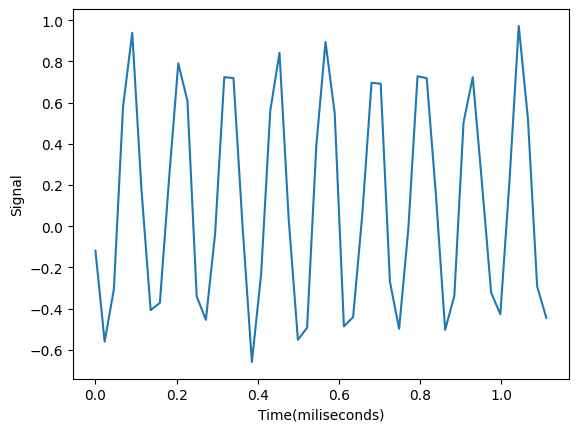

In [13]:
plt.plot(time_axis,signal)
plt.xlabel('Time(miliseconds)')
plt.ylabel('Signal')
plt.show()

오디오 신호를 주파수 영역으로 변환
  - 주파수,위상,진폭이 다양하게 존재하는 사인파
  - 주파수 분석은 주파수 스펙트럼분석
  - 푸리에변환 : 시간영역 신호를 주파수 영역으로 변환

In [40]:
sampling, signal = wavfile.read('/content/s_word_26.wav')
# 정규화
signal = signal / np.power(2,15)

In [41]:
# 오디오 신호 길이 추출
len_signal = len(signal)
# 절반길이 추출
len_half = int(np.ceil((len_signal+1)/2.0))
len_signal, len_half

(3251, 1626)

In [42]:
# 퓨리에 변환
freq_signal = np.fft.fft(signal)

In [43]:
# 주파수 영역을 정규화 제곱
freq_signal = abs(freq_signal[0:len_half]) / len_signal
freq_signal **= 2

In [44]:
# 홀수와 짜수를 구분해서 푸리에 변환 신호를 적용
# 주파수 변환신호의 길이 추출
len_fts = len(freq_signal)

# 짝수 홀수 신호 적용
if len_signal % 2:  # 짝수면 0이나오고 if문장에서 false로 계산
  freq_signal[1:len_fts] *=2
else:
  freq_signal[1:len_fts-1] *=2

In [45]:
# 신호 강도 db 추출
signal_power = 10*np.log10(freq_signal)

In [46]:
# x축 구축
x_axis = np.arange(0,len_half,1)*(sampling / len_signal) / 1000.0
x_axis

array([0.00000000e+00, 2.46078130e-03, 4.92156260e-03, ...,
       3.99384805e+00, 3.99630883e+00, 3.99876961e+00])

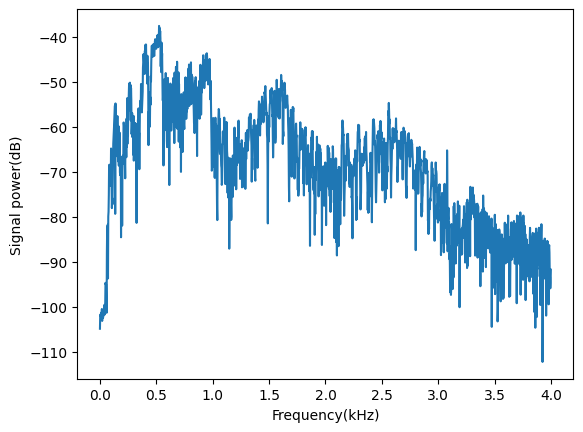

In [47]:
plt.plot(x_axis, signal_power)
plt.xlabel('Frequency(kHz)')
plt.ylabel('Signal power(dB)')
plt.show()